If all teams have their code working, the following should run. 

In [1]:
from downloadTowerData import downloadTowerData
from kNN import kNN
from GreedyGraphColoring import GreedyGraphColoring
from mapplot import mapplot



In [4]:
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
filename = 'garbage.csv'
locations = downloadTowerData(filename)
locations

In [8]:
import random
import numpy as np
#you need to pass it something for the argument, but it doesn't use whatever you pass it
def downloadTowerData(filename):
    N = 10
    i=0
    loc=[]
    while i < N:
        y = random.random()
        x = random.random()
        coord = [x,y]
        loc.append(coord)
        i=i+1
    loc = np.array(loc)
    return(loc)

In [ ]:
k = 3
graph = kNN(locations,k)

nx.draw(graph)

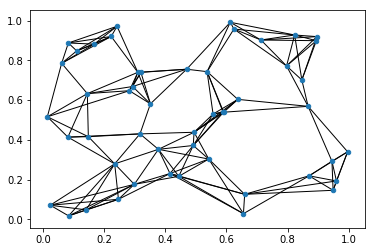

In [9]:
def kNN(points, k = 1):
    """
    By: Group 2 for CMSE 802 
    Date: 2/17/21
    Function: Calculate k-NN graph.
    """

    from sklearn.neighbors import NearestNeighbors
    
    points = np.array(points) #change to numpy array
    
    # get shape of vectors of positions and do shape check to validate it is correct shape.
    row, col = points.shape[0], points.shape[1]
    if col != 2: #should be (N x 2) array
        points = points.T
    N = points.shape[0]

    G = nx.Graph() #intiialize graph
    G.add_nodes_from(list(range(N))) #add all vertices to graph
    
    #find distances and indices of points that are k-NN using sklearn package
    nbrs = NearestNeighbors(n_neighbors=k+1, algorithm='ball_tree').fit(points)
    distances, indices = nbrs.kneighbors(points)
    
    #add all edges to graph based on k nearest neighbor condition
    for edge_set in indices: #go through list of nearest neighbors for point
        for index_of_vertex in edge_set[1:]: #go through those neighbors (skipping self as first)
            edge = [edge_set[0], index_of_vertex] #define the edge
            G.add_edge(edge[0], edge[1]) #add the edge
    
    return G


    
# In[ ]: 


if __name__ == "__main__":

    def generate_towers(N):
        import numpy as np
        x = np.random.uniform(0, 1, N)
        y = np.random.uniform(0, 1, N)
        points = np.array([x,y]).T
        return points 

    points = generate_towers(50)
    
    G = kNN(points, k = 5)
    
    node_pos = {}
    for v in G.nodes():
        node_pos[v] = points[v,:]
    
    fig, ax = plt.subplots()
    nx.draw(G,node_pos, node_size = 20)
    limits = plt.axis('on')
    ax.tick_params(left = True, bottom = True,labelleft=True, labelbottom=True)
    plt.show()

In [ ]:
M = 4

colors = GreedyGraphColoring(graph, M)

colors

In [28]:
from random import randrange
import numpy as np
#Colouring Stub function
def GreedyGraphColoring(graph, M=3):

    G = graph
    #d = nx.coloring.equitable_color(G, num_colors=M)
    #s = nx.algorithms.coloring.equitable_coloring.is_equitable(G, d)
    #s = nx.greedy_color(G, num_colors=M)
    colour_map = nx.greedy_color(graph, strategy='largest_first', interchange=False)
    data = list(colour_map.items())
    an_array = np.array(data)
    colour_map = an_array[:,1]
                          
    return colour_map
  

array([0, 1, 0, 0, 1, 2, 2, 1, 2, 2])

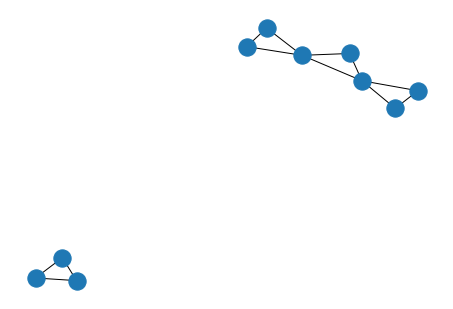

In [29]:
filename = 'garbage.csv'
locations = downloadTowerData(filename)

k = 2
graph = kNN(locations,k)

nx.draw(graph)
M = 8
colors = GreedyGraphColoring(graph,M)
colors

In [7]:
G = nx.cycle_graph(4)
d = nx.coloring.equitable_color(G, num_colors=M)
nx.algorithms.coloring.equitable_coloring.is_equitable(G, d)


{0: 2, 1: 1, 2: 2, 3: 0}

In [ ]:
mapplot(locations, colors)